# 1. Plotting for Exploratory data analysis (EDA) - Haberman Cancer Survival 

# <B>(1.1) Basic Terminology</B>

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Haberman’s Survival Data Set

Toy  Dataset: Haberman's Survival Data Set: [https://drive.google.com/file/d/1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2/view?usp=sharing]
* Data Set Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Number of data points: 306
*  Number of Attributes: 4 (including the class attribute)

##### <p><u> Attribute Information:</u>
* Age of patient at time of operation (numerical)
* Patient’s year of operation (year — 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute)
* — 1 = the patient survived 5 years or longer
* — 2 = the patient died within 5 years</p>

### <u> Objective :
To find whether the patient will survive more than 5 years or die within five year based on age of patient,year of operation and number of positive axillary nodes

# <B>(1.2) Basic EDA</B>

In [2]:
%reset -f
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haber = pd.read_csv("haberman.csv")



In [3]:
# (Q) how many data-points and features?
print (haber.shape)

(306, 4)


In [4]:
# (Q) get the top view of the data
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#(Q) What are the column names in our dataset?
print (haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
# (Q) how to specify column names to data set manually
column_names = ['Age', 'Year', 'Positive_Axillary_Nodes', 'Survival_Status']
haber.columns = column_names
haber.head()

,Age,Year,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
# Survival Status counts to know the survival rate of the Patients:
haber["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

<B>Observations:</B> From above piece of code we can conclude that there are 225 patients out of 306 who survived more than 5 years and only 81 patients survived less than 5 years

In [8]:
haber.describe()

,Age,Year,Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:
* Total number of rows is 306 and columns is 4.
* There are no missing values.
* About 25% of people have no axilary nodes detected.
* Mean age of people is 52
* We can see that there are 225 people survived and 81 people not survived. As 225 is almost triple of 81,we can see that our target set is slightly imbalenced.

# <B>(1.3) 2-D Scatter Plot</B>

Lymph nodes are responsible for filtering lymph fluid and detecting chemical changes that signal an infection is present. When these filter points are in the armpit, doctors call them axillary lymph nodes.

As axillary lymph nodes are near the breasts, they are often the first location to which breast cancer spreads if it moves beyond the breast tissue.

The number of axillary lymph nodes can vary from person to person, ranging from five nodes to more than 30.

Lets Plot the Auxilary/Lymph Nodes vs Age of the person

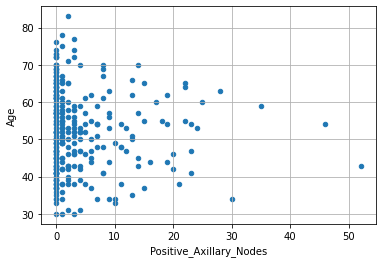

In [9]:
haber.plot(kind='scatter',x='Positive_Axillary_Nodes',y='Age')
plt.grid();
plt.show();

<B>Observations:</B> From this graph we can see the Age vs no. of Positive Auxilary Nodes in the graph. Above scatter plot shows all data in overlap fashion and also in same colour due to which we are unable to distinguish between data and also there are possibilities that you may miss some of my data which may lead to wrong conclusion. So, to distinguish between the data we can use seaborn packages function which simply to distinguish data visually by allocating different colours to every classification feature.

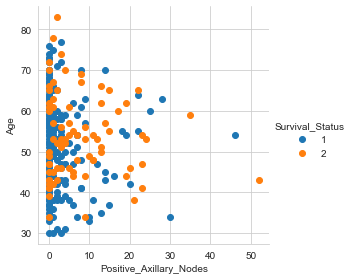

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(haber,hue="Survival_Status",height=4) \
.map(plt.scatter,"Positive_Axillary_Nodes","Age") \
.add_legend();
plt.show();

<B>Observations: </B>In above snippet, I import functions from seaborn library like FacetGrid due to which we are able to distinguish between the data classification.Here blue dots represent survival more than 5 years and orange dots represent survival less than 5 years.
As there are 3 features from which we can conclude our classification so how can we select any feature from all so that we can get output with less error rate. 

# (1.4) <B>Pair Plot</B>

To do so we can use pairplots from seaborn to plot of various combination from which we can select best pair for our further operation and final conclusion. hue=”Survival_Status” will give on which feature you need to do classification. Below image shows the plotting of pairplots combination and code snippet for it.

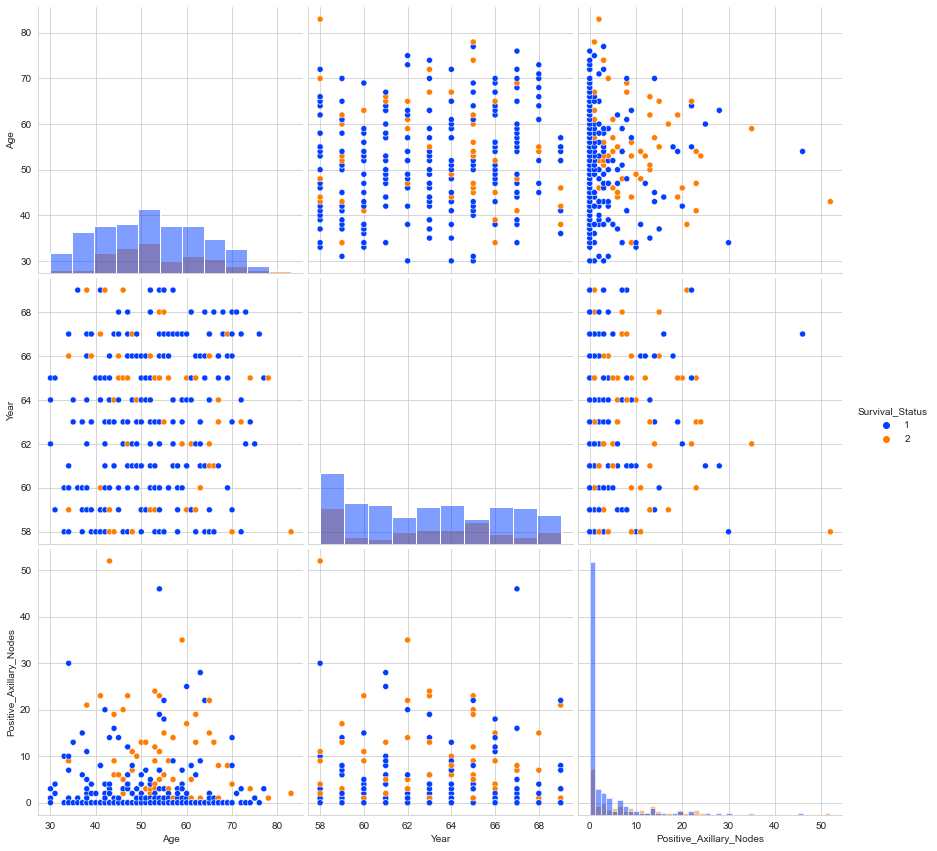

In [13]:
plt.close();
sns.set_style("whitegrid");
#sns.pairplot(haber)
sns.pairplot(haber, hue="Survival_Status", height=4,palette='bright',kind='scatter',diag_kind='hist');
#sns.pairplot(haber, hue="Survival_Status", size=4, vars=["Age","Year", "Positive_Axillary_Nodes"])
plt.show();

<B>Observation:</B> we will consider the feature Age and Axillary nodes plotting in the Plot 3 and 7 for all further data operations as all the other plots we are not getting much information and we can deal with misleading information.

# (1.5) <B> 1-D Scatter Plot </B>

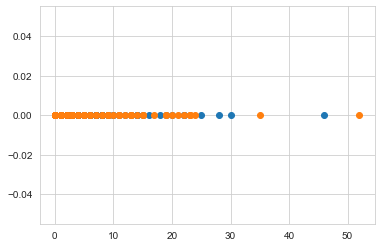

In [14]:
haberman_long_live = haber.loc[haber["Survival_Status"] == 1];
haberman_short_live = haber.loc[haber["Survival_Status"] == 2];
plt.plot(haberman_long_live["Positive_Axillary_Nodes"], np.zeros_like(haberman_long_live['Positive_Axillary_Nodes']), 'o')
plt.plot(haberman_short_live["Positive_Axillary_Nodes"], np.zeros_like(haberman_short_live['Positive_Axillary_Nodes']), 'o')
plt.show()

<B>Observation: </B> Here long living and short living patients are overlapping so 1-D scatter is not enough. so we need to analyse it better using PDF or CDF

# (2) <B> Histogram, PDF, CDF </B>

<B>PDF (Probability Density Function):-</B> It shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram
<br><B>CDF (Cumulative Distribution Function):-</B> It is representation of cumulative data of PDF ie. it will plot a graph by considering PDF for every data point cumulatively.
Seaborn library will help you to plot PDF and CDF of any data so that you can easily visualise the density of data present on specific point.Below code snippet will plot the PDF

### <B> PDF - Survival Status using AGE </B>

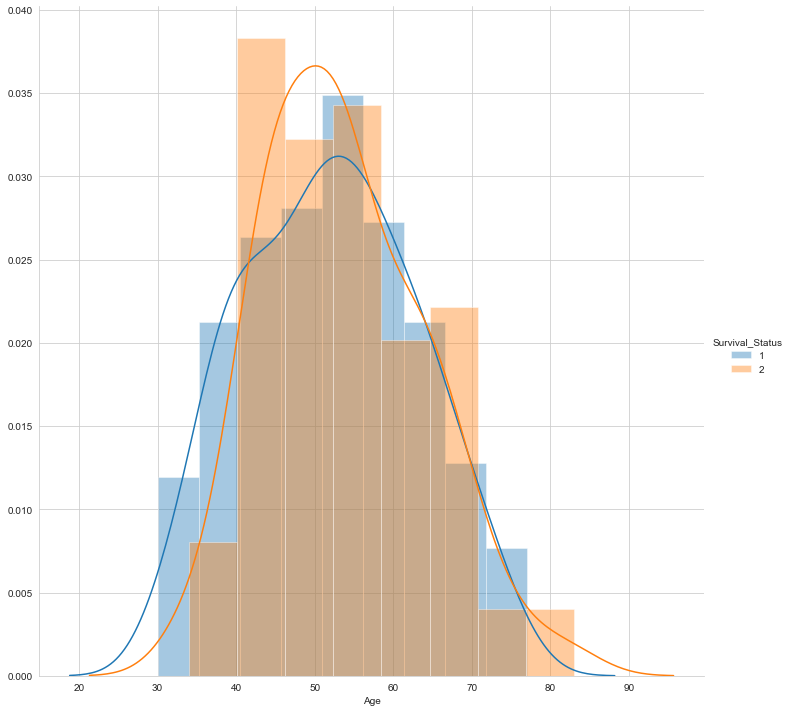

In [15]:
sns.FacetGrid(haber,hue="Survival_Status", size=10)\
.map(sns.distplot,"Age")\
.add_legend();
plt.show();

<B>Observations:</B> So here we can see that from age 35 to 75 the survival rate is same so we cannot determine any thing from this. Let's see other options.

### <B> PDF - Survival Status using Year </B>

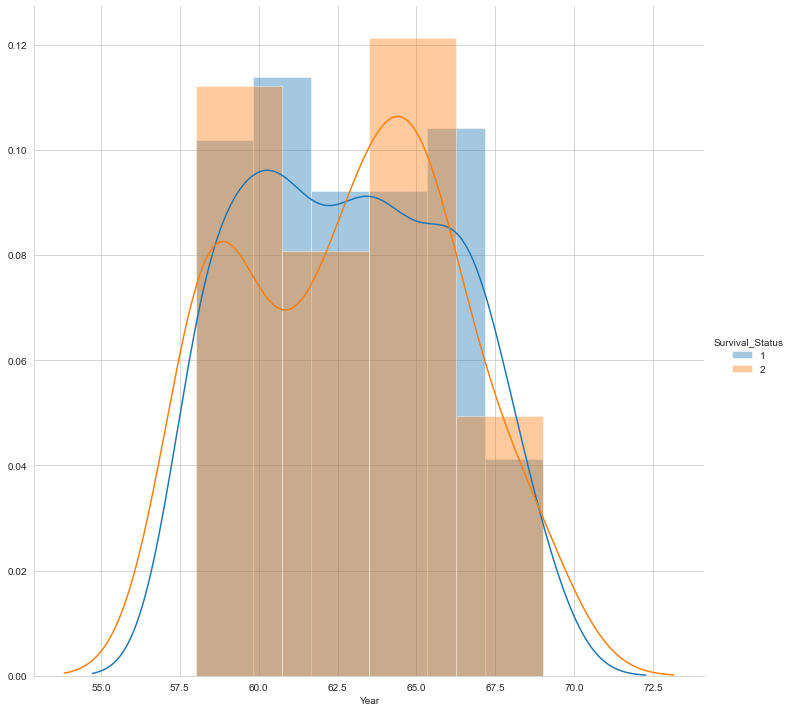

In [16]:
sns.FacetGrid(haber,hue="Survival_Status", size=10)\
.map(sns.distplot,"Year")\
.add_legend();
plt.show();

<B> Observations :</B> From this also we cannot deduce any thing as the survival seems to be equal for the operation years.

### <B> PDF - Survival Status using Positive_Axillary_Nodes </B>

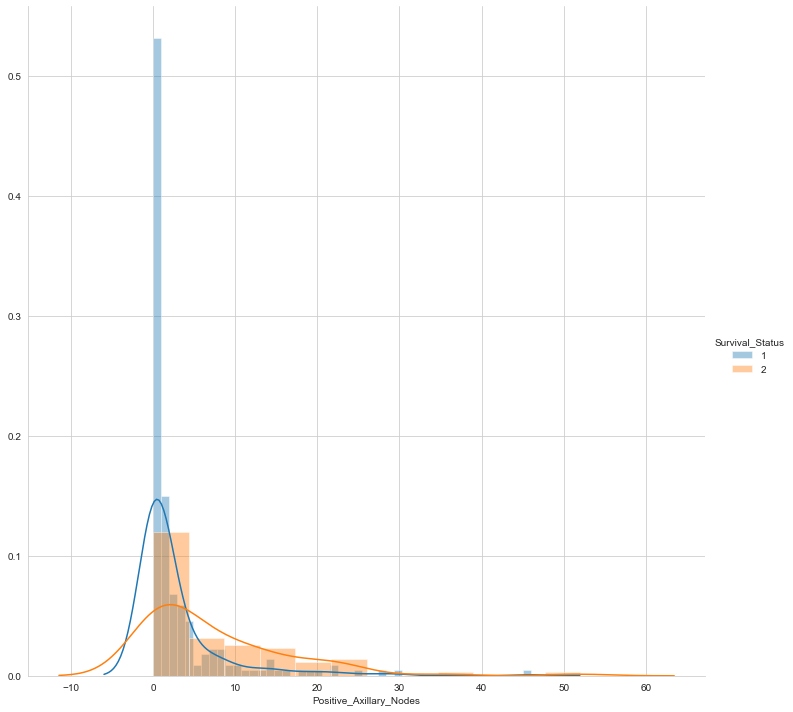

In [17]:
sns.FacetGrid(haber,hue="Survival_Status", size=10)\
.map(sns.distplot,"Positive_Axillary_Nodes")\
.add_legend();
plt.show();

<B> Observation:</B> It has been observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify but this is the best data you can choose among all. So, we accept the PDF of Axillary nodes and can conclude below result.

<P style="font-family:Bodoni MT Black">if(AxillaryNodes≤0),<BR>
Patient= Long survival<BR>
else if(AxillaryNodes≥0 && Axillary nodes≤3.5(approx))<BR>
Patient= Long survival chances are high<BR>
else if(Axillary nodes ≥3.5)<BR>
Patient = Short survival</P>

So from above PDF we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or long survive. <BR>To know that we have another distribution that is CDF.
CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of patient survival status.<BR>
Let’s plot CDF for our selected feature which is Axillary nodes

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0.5, 0, 'CDF for both Long Survivors')

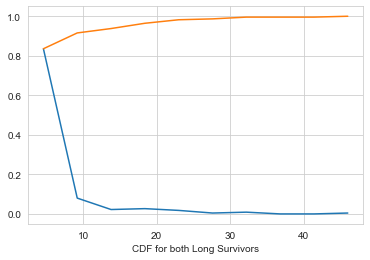

In [18]:
counts, bin_edges = np.histogram(haberman_long_live['Positive_Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel("CDF for both Long Survivors")


From above CDF we can observe that orange line shows there is a 85% chance of long survival if number of axillary nodes detected are < 5.<BR> Also we can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40<BR><BR>
Let’s try to plot CDF for both feature in a single plot. To do so just add below code in existing code written for Long Survival

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


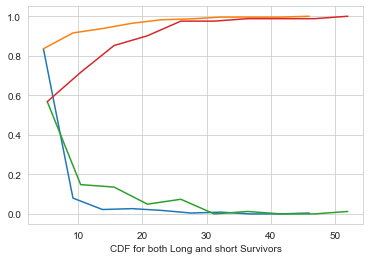

In [19]:
counts, bin_edges = np.histogram(haberman_long_live['Positive_Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_short_live['Positive_Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("CDF for both Long and short Survivors")
plt.show();

<B>Observations:</B> We can observe in above combine CDF for Long survival observation is same but in Short survival nearly 55% of people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

We can also predict patients status by applying mathematical formulae like <B>Standard Deviation</B> and <B>Mean</B>.

# <B>(3.0) Mean, Variance and Std-dev</B>

In [23]:
#Mean, Variance, Std-deviation,  
print("--------------------------------------------------------------------")
print("MEAN:")
print("--------------------------------------------------------------------")
print("Mean of Long Surviving Patients: ", np.mean(haberman_long_live["Positive_Axillary_Nodes"]))
print("Mean of Short Surviving Patients:", np.mean(haberman_short_live["Positive_Axillary_Nodes"]))
#Mean with an outlier.
print("Mean Outlier with Long surviving Patients:", np.mean(np.append(haberman_long_live["Positive_Axillary_Nodes"],50)))
print("Mean Outlier with Short surviving Patients:", np.mean(np.append(haberman_short_live["Positive_Axillary_Nodes"],50)))
#variance
print("--------------------------------------------------------------------")
print("VARIANCE:")
print("--------------------------------------------------------------------")
print("Variance of Long Surviving Patients: ",np.var(haberman_long_live["Positive_Axillary_Nodes"]))
print("Variance of Short Surviving Patients: ",np.var(haberman_short_live["Positive_Axillary_Nodes"]))
print("Variance Outlier with Long surviving Patients:", np.var(np.append(haberman_long_live["Positive_Axillary_Nodes"],50)))
print("Variance with Short surviving Patients:", np.var(np.append(haberman_short_live["Positive_Axillary_Nodes"],50)))
#Stanard-Deviation
print("--------------------------------------------------------------------")
print("STANDARD-DEVIATION:")
print("--------------------------------------------------------------------")
print("Std-Dev of Long Surviving Patients: ",np.std(haberman_long_live["Positive_Axillary_Nodes"]))
print("Variance of Short Surviving Patients: ",np.std(haberman_short_live["Positive_Axillary_Nodes"]))
print("Variance Outlier with Long surviving Patients:", np.std(np.append(haberman_long_live["Positive_Axillary_Nodes"],50)))
print("Variance with Short surviving Patients:", np.std(np.append(haberman_short_live["Positive_Axillary_Nodes"],50)))

--------------------------------------------------------------------
MEAN:
--------------------------------------------------------------------
Mean of Long Surviving Patients:  2.7911111111111113
Mean of Short Surviving Patients: 7.45679012345679
Mean Outlier with Long surviving Patients: 3.0
Mean Outlier with Short surviving Patients: 7.975609756097561
--------------------------------------------------------------------
VARIANCE:
--------------------------------------------------------------------
Variance of Long Surviving Patients:  34.30747654320981
Variance of Short Surviving Patients:  83.3345526596555
Variance Outlier with Long surviving Patients: 43.97345132743363
Variance with Short surviving Patients: 104.12135633551458
--------------------------------------------------------------------
STANDARD-DEVIATION:
--------------------------------------------------------------------
Std-Dev of Long Surviving Patients:  5.857258449412131
Variance of Short Surviving Patients:  9.12877

<p>Here we can see in line 3, I have added outlier(data which is very large or small compare to respective data. It may be an error or exception case while collecting data) even though the mean of data is not much affected.</p><BR>
<p>You can observe that for Long survive mean is 2.79 and including outlier it is 3 that is almost same, but the mean of Short survive is 7.4 which is comparatively much higher than Long survive. So the probability for short survive is more in data set.</p><BR>
<p>If you observe the standard deviation Long survive has standard deviation of only 5.85 and Short survive has 9.12, means the spread of data for short survive is more.</p>

So We will compute more mathematical operations such as <B>Median</B>, <B>Percentile</B>, <B>Quantile</B>, <B>IQR</B> and <B>MAD</B>

# <B>(3.1) Median, Percentile, Quantile, IQR, MAD</B>

In [25]:
#median
print("--------------------------------------------------------------------")
print("MEDIAN:")
print("--------------------------------------------------------------------")
print("Median of Long Surviving Patients: ",np.median(haberman_long_live["Positive_Axillary_Nodes"]))
print("Median of Short Surviving Patients:",np.median(haberman_short_live["Positive_Axillary_Nodes"]))

#Median with an outlier.
print("Mean Outlier with Long surviving Patients:", np.median(np.append(haberman_long_live["Positive_Axillary_Nodes"],50)))
print("Mean Outlier with Short surviving Patients:", np.median(np.append(haberman_short_live["Positive_Axillary_Nodes"],50)))

#Percentiles
print("--------------------------------------------------------------------")
print("90th PERCENTILE:")
print("--------------------------------------------------------------------")
print("Percentile of Long Surviving Patients:", np.percentile(haberman_long_live["Positive_Axillary_Nodes"],90))
print("Percentile of Short Surviving Patients:", np.percentile(haberman_short_live["Positive_Axillary_Nodes"],90))

#Quantiles
print("--------------------------------------------------------------------")
print("QUANTILE:")
print("--------------------------------------------------------------------")
print("Quantile of Long Surviving Patients: ",np.percentile(haberman_long_live["Positive_Axillary_Nodes"],np.arange(0,100,25)))
print("Quantile of Short Surviving Patients:",np.percentile(haberman_short_live["Positive_Axillary_Nodes"],np.arange(0,100,25)))

#90th quantile
print("--------------------------------------------------------------------")
print("90th QUANTILE:")
print("--------------------------------------------------------------------")
print("90th Quantile of Long Surviving Patients: ", np.percentile(haberman_long_live["Positive_Axillary_Nodes"],90))
print("90th Quantile of Long Surviving Patients: ", np.percentile(haberman_short_live["Positive_Axillary_Nodes"],90))
#inter quantiles
Q1=np.percentile(haberman_long_live["Positive_Axillary_Nodes"],25)
Q2=np.percentile(haberman_long_live["Positive_Axillary_Nodes"],75)
Q3=np.percentile(haberman_short_live["Positive_Axillary_Nodes"],25)
Q4=np.percentile(haberman_short_live["Positive_Axillary_Nodes"],75)

print("--------------------------------------------------------------------")
print("INTER-QUANTILE:")
print("--------------------------------------------------------------------")
print("Inter-Quantile of Long Surviving Patients: ",Q2-Q1)
print("Inter-Quantile of Short Surviving Patients: ",Q4-Q3)

print("--------------------------------------------------------------------")
print("Median Absolute Deviation(MAD): ")
print("--------------------------------------------------------------------")
from statsmodels import robust
print("MAD of Long Surviving Patients: ", robust.mad(haberman_long_live["Positive_Axillary_Nodes"]))
print("MAD of Long Surviving Patients: ", robust.mad(haberman_short_live["Positive_Axillary_Nodes"]))



--------------------------------------------------------------------
MEDIAN:
--------------------------------------------------------------------
Median of Long Surviving Patients:  0.0
Median of Short Surviving Patients: 4.0
Mean Outlier with Long surviving Patients: 0.0
Mean Outlier with Short surviving Patients: 4.0
--------------------------------------------------------------------
90th PERCENTILE:
--------------------------------------------------------------------
Percentile of Long Surviving Patients: 8.0
Percentile of Short Surviving Patients: 20.0
--------------------------------------------------------------------
QUANTILE:
--------------------------------------------------------------------
Quantile of Long Surviving Patients:  [0. 0. 0. 3.]
Quantile of Short Surviving Patients: [ 0.  1.  4. 11.]
--------------------------------------------------------------------
90th QUANTILE:
--------------------------------------------------------------------
90th Quantile of Long Survi

Median is the centre value of data and Quantiles are the value of specific feature on nth Percentage n= 25,50,75 and nth Percentile is similar to Quantiles but n could be any number from 1 to 100.<Br>

So, for our data set we have values of these terms as follows

<B>Observation :</B><BR>
<p>1. From above observation it is clear that average axillary nodes in long survival is 0 and for short survival it is 4. i.e, Patients who have average 4 auxillary nodes have short survival status.</p>
<p>2. Quantiles shows that nearly 50th% of axillary nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.</P>
<p>3. Similarly, In short survival 75th% of patients have minimum 11 nodes detected.</p>
<p>4. At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status</p>

# <B>(3.2) Box plot and Whiskers</B>

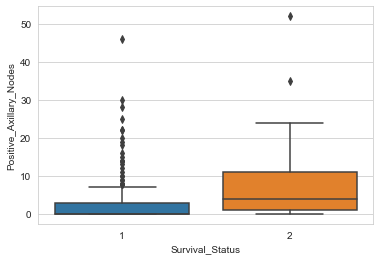

In [26]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Survival_Status',y='Positive_Axillary_Nodes', data=haber)
plt.show()

<p>Here you can read this plot by observing it’s box height and width and T like structure. height of box represents all data between 25th percentile to 75th percentile and that horizontal bar represents maximum range of that data and width of box represents spread of that data in data set.</p><p>Also, the small point above that vertical bar are outliers.</p><br>
<B>Observation:</B><br> <p>1. In above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7.</p> <p>2. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile.</p> <p>3. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2</p>
So,if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status
There are most of point above 12 lies in Short survival

# <B>(3.3) Violin plots</B>

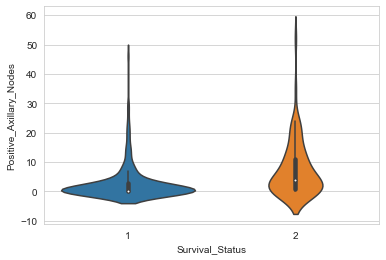

In [27]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Survival_Status", y="Positive_Axillary_Nodes", data=haber, size=10)
plt.legend
plt.show()

<p>It is same as Box whiskers plot only difference is instead of box histogram will represents spread of data.</p>
<B>Observation:</B> In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range 0-7 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–12

# <B>(3.4) Contour Plots</B>

<B>Contour plots are like density plot means if the number of data is more on specific point that area will get darker and if you visualise it will make hill like structure where hill top has maximum density of point and density decreases as hill slope getting decreases.</B>

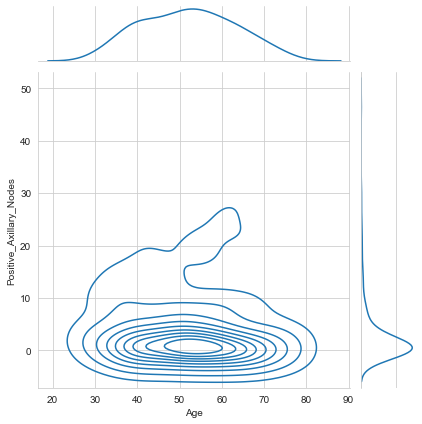

In [29]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="Positive_Axillary_Nodes", data=haberman_long_live, kind="kde");
plt.grid()
plt.show();

<B>Observation:</B> Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

# <B>(4.0) Conclusion:</B>


<p>1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.</p>
<p>2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.</p>
<p>3. Somehow axillary_lymph_node is giving some intution in the dataset.</p>
<p>3. We can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.</p>



# Completed Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.